In [1]:
# Now the current model is builded with LangChain from HuggingFace NER Model
!pip install -q transformers einops accelerate langchain bitsandbytes
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 735.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [2]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

# Imported from Huggingface LLM MOdel for NER
model = "Universal-NER/UniNER-7B-all"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation", #task
    model=model,
    tokenizer=tokenizer,
    trust_remote_code=True,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,

)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/766 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00003.bin:   0%|          | 0.00/9.88G [00:00<?, ?B/s]

pytorch_model-00002-of-00003.bin:   0%|          | 0.00/9.89G [00:00<?, ?B/s]

pytorch_model-00003-of-00003.bin:   0%|          | 0.00/7.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [3]:
llm = HuggingFacePipeline(pipeline = pipeline, model_kwargs = {'temperature':0})

In [4]:
# Using Langchain
from langchain import PromptTemplate, LLMChain

template = """
              A virtual assistant answers questions from a user based on the provided text.
              USER: Text: {input_text}
              ASSISTANT: I’ve read this text.
              USER: What describes {entity_type} in the text?
              ASSISTANT:
           """

prompt = PromptTemplate(template=template, input_variables=["input_text","entity_type"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [7]:
# Entities extraction1
with open ("/content/final.txt", "r", errors='replace') as myfile:
    text=myfile.readlines()
print(text)
text1 ="""
Coronavirus disease-19 (COVID-19) pandemic will be infamously written in history forever, like Black Death and Spanish flu. Severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2) is the etiological agent responsible for this pandemic which originated in Wuhan, China, in early December 2019. World Health Organization (WHO) named this disease coronavirus disease-19 (COVID-19) on December 29, 2019. Since the declaration of COVID-19 as a pandemic by the WHO on March 11, 2020 till July 30, 2021, more than 196 million COVID-19 confirmed cases including 4,200,412 deaths were reported, making it one of the deadliest pandemics recorded in human history [1]. SARS-CoV-2 has possibly adapted toward its spread and sustenance for transmission within the community with R° of between 2 and 2.5.
"""
entity_type="viruses"
print(llm_chain.run({"input_text":text1,"entity_type":entity_type}))

['In 2003�2004 we saw the emergence of SARS, Avian influenza and Anthrax in a man made form used for bioterrorism. Emergency powers legislation in Australia is a patchwork of Commonwealth quarantine laws and State and Territory based emergency powers in public health legislation. It is time for a review of such legislation and time for consideration of the efficacy of such legislation from a country wide perspective in an age when we have to consider the possibility of mass outbreaks of communicable diseases which ignore jurisdictional boundaries."\n', " In 2003, the major public health policy developments in communicable disease control were in the fields of SARS, and vaccine funding, whilst the TGA was focused on the Pan Pharmaceutical crisis. Programs directed to health maintenance and healthy ageing were approved. The tertiary education sector was involved in the development of programs for training the public health workforce and new professional qualifications and competencies. T

In [8]:
#Entities extraction2
text2 ="""
Researchers isolated the virus causing the pneumonia in December 2019 and found it to be a strain of β-coronavirus (CoV). The virus showed a high nucleotide sequence homology with two severe acute respiratory syndrome (SARS)-like bat coronaviruses, bat-SL-CoVZC45 and bat-SL-CoVZXC21 (88% homology) and with SARS-CoV (79.5% homology), while only 50% homology with the Middle East respiratory syndrome coronavirus(MERS)-CoV.2,3 The virus, now named SARS-CoV-2, contains a single positive stranded RNA (ribonucleic acid) of 30 kilobases,
which encodes for 10 genes.4 Researchers have shown that the virus can enter cells by binding the angiotensin-converting enzyme 2 (ACE2), through its receptor binding domain in the spike protein.5
The virus causes the coronavirus disease 2019 (COVID-19), with common symptoms such as fever, cough, shortness of breath and fatigue.6,7 Early data indicated that about 20% of patients develop severe COVID-19 requiring hospitalization, including 5% who are admitted to the intensive care unit.8 Initial estimates of the case fatality rates were from 3.4% to 6.6% which is lower than that of SARS or MERS, 9.6% and 34.3% respectively.9–11 The mortality from COVID-19 is higher in people older than 65 years and in people with underlying comorbidities, such as chronic lung disease, serious heart conditions, high blood pressure, obesity and diabetes
"""
entity_type="Disease"
print(llm_chain.run({"input_text":text2,"entity_type":entity_type}))

 ["pneumonia", "severe acute respiratory syndrome", "SARS", "Middle East respiratory syndrome", "coronavirus disease 2019", "COVID-19", "SARS or MERS", "chronic lung disease", "serious heart conditions", "high blood pressure", "obesity", "diabetes"]


In [9]:
#Entities extraction3
text3 ="""
All viruses mutate. But three variants of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) have raised particular concerns. On Jan 21, 2021, the UK New and Emerging Respiratory Virus Threats Advisory Group (NERVTAG) issued a paper outlining the results from several preliminary analyses of B.1.1.7. The variant, which is highly transmissible, was initially identified in the south of England in September 2020, and has since spread to dozens of countries around the world. It carries 17 mutations in its genome, including eight in the spike protein, which forms the basis of the three COVID-19 vaccines that have been licensed in the UK. NERVTAG concluded that there was a “realistic possibility” that infection with B.1.1.7 is associated with an increased risk of death, compared with infection with the parental virus. The group stressed that its assessment was based on limited preliminary data and even if the results were confirmed, the overall risk of death would still be low.
Another extremely infectious variant, P.1, has been circulating in Brazil since the middle of 2020. This variant has been implicated in the surge of infections that has struck Manaus, in the Brazilian Amazon, leaving the health-care system on the brink of collapse. B.1.351 was first detected in South Africa late last year. On Jan 25, Moderna said that in-vitro studies indicated that its vaccine would be effective against B.1.351 and B.1.1.7. However, the South African variant was associated with a substantial reduction in neutralising antibodies. Pfizer has revealed that laboratory tests suggested that its vaccine would work against B.1.1.7. The studies have not been peer reviewed. Both companies have said that they are investigating booster shots to protect against variants of SARS-CoV-2.
Making sense of how the variants will influence the pandemic is the task of the newly formed G2P-UK National Virology Consortium. Its remit is to use cell cultures and animal models to examine how the mutations affect the transmissibility of the virus, the severity of the disease, and the effectiveness of the vaccines and treatments. The initiative brings together researchers at ten academic institutions in the UK, who will work alongside the COVID-19 Genomics UK Consortium.
The UK has generated almost half of the approximately 400 000 genomic sequences of SARS-CoV-2.
"""
entity_type="virus"
print(llm_chain.run({"input_text":text3,"entity_type":entity_type}))

 ["severe acute respiratory syndrome coronavirus 2", "B.1.1.7", "B.1.351"]


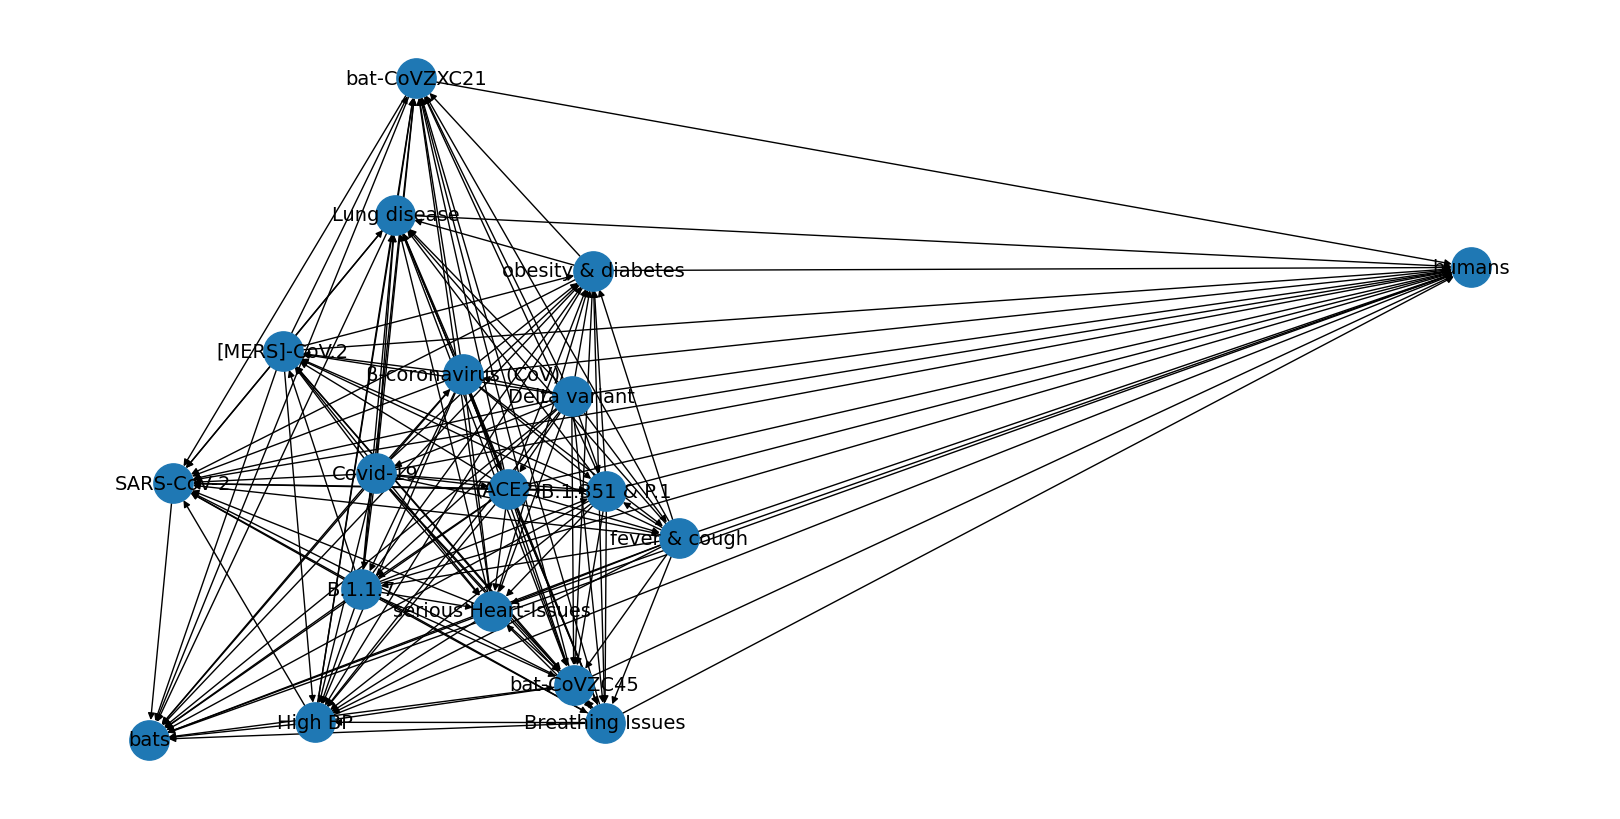

In [4]:
# With Multiple Entities
import networkx as nx
import matplotlib.pyplot as plt

text_data = [
    "The emergence of the Delta variant has caused a surge in COVID-19 cases worldwide.",
    "SARS-CoV-2 originated in bats and may have been transmitted to humans through an intermediate host.",
    "Genetic mutations in the spike protein of SARS-CoV-2 contribute to the emergence of new variants.",
    "The virus causes the coronavirus disease 2019 (COVID-19), with common symptoms such as fever, cough, shortness of breath and fatigue.6,7 Early data indicated that about 20% of patients develop severe COVID-19 requiring hospitalization, including 5% who are admitted to the intensive care unit.8 Initial estimates of the case fatality rates were from 3.4% to 6.6% which is lower than that of SARS or MERS, 9.6% and 34.3% respectively.9–11 The mortality from COVID-19 is higher in people older than 65 years and in people with underlying comorbidities, such as chronic lung disease, serious heart conditions, high blood pressure, obesity and diabetes"
    "All viruses mutate. But three variants of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) have raised particular concerns. On Jan 21, 2021, the UK New and Emerging Respiratory Virus Threats Advisory Group (NERVTAG) issued a paper outlining the results from several preliminary analyses of B.1.1.7. The variant, which is highly transmissible, was initially identified in the south of England in September 2020, and has since spread to dozens of countries around the world. It carries 17 mutations in its genome, including eight in the spike protein, which forms the basis of the three COVID-19 vaccines that have been licensed in the UK. NERVTAG concluded that there was a “realistic possibility” that infection with B.1.1.7 is associated with an increased risk of death, compared with infection with the parental virus. The group stressed that its assessment was based on limited preliminary data and even if the results were confirmed, the overall risk of death would still be low."
]

# Function to extract entities from text using NER
def extract_entities(text):
    # NER model
    # using the fine-tuned NER model as in the previous code snippet
    entities = [('Delta variant', 'VARIANT'), ('Covid-19', 'CAUSE'), ('β-coronavirus (CoV)', 'VARIANT'), ('(ACE2)' , 'VARIANT'), ('fever & cough', 'symptoms'), ('B.1.1.7', 'VARIANT'), ('B.1.351 & P.1', 'VARIANT'), ('Breathing Issues', 'symptoms'), ('[MERS]-CoV.2', 'CAUSE'), ('serious Heart-Issues', 'symptoms'),('obesity & diabetes', 'symptoms'),('High BP', 'symptoms'),('Lung disease', 'symptoms'), ('bat-CoVZC45','VARIANT'),('bat-CoVZXC21','VARIANT'),('SARS-CoV-2', 'CAUSE'), ('bats', 'CAUSE'), ('humans', 'CAUSE')]
    return entities

# Function to construct the knowledge graph
def construct_knowledge_graph(text_data):
    G = nx.DiGraph()

    for text in text_data:
        entities = extract_entities(text)

        # Add nodes for entities
        for entity, label in entities:
            G.add_node(entity, label=label)

        # Add edges between entities
        for i in range(len(entities)):
            for j in range(i+1, len(entities)):
                G.add_edge(entities[i][0], entities[j][0])
    return G

# Construct the knowledge graph
knowledge_graph = construct_knowledge_graph(text_data)
# Set figure size
plt.figure(figsize=(16, 8))
# Draw the graph with larger node and font sizes
nx.draw(knowledge_graph, with_labels=True, node_size=800, font_size=14)
# Show the plot
plt.show()

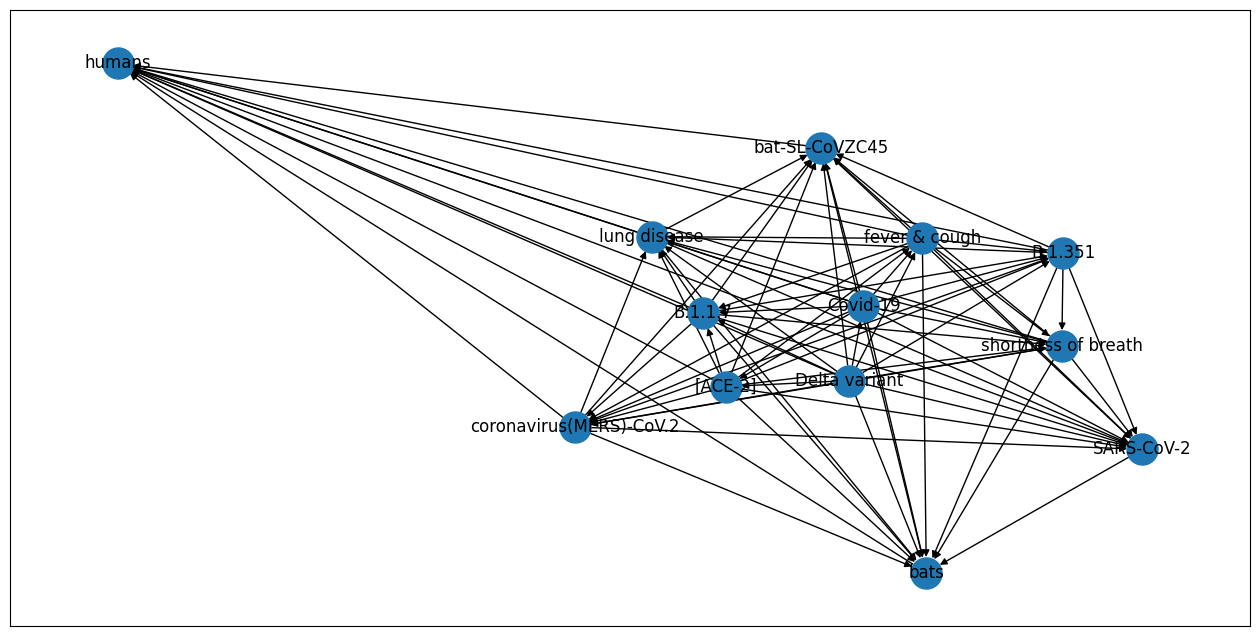

In [118]:
# With Multiple Plot Layouts (Needed to switch in Below [pos] line statememts)
knowledge_graph = construct_knowledge_graph(text_data)
# Set figure size
plt.figure(figsize=(16, 8))

# Draw the graph with larger node and font sizes
pos = nx.spring_layout(knowledge_graph)
#pos = nx.kamada_kawai_layout(knowledge_graph)
#pos = nx.circular_layout(knowledge_graph)
#pos = nx.random_layout(knowledge_graph)

# Draw the graph with directional arrows
nx.draw_networkx(knowledge_graph, pos, with_labels=True, node_size=500, font_size=12, arrows=True)

# Show the plot
plt.show()

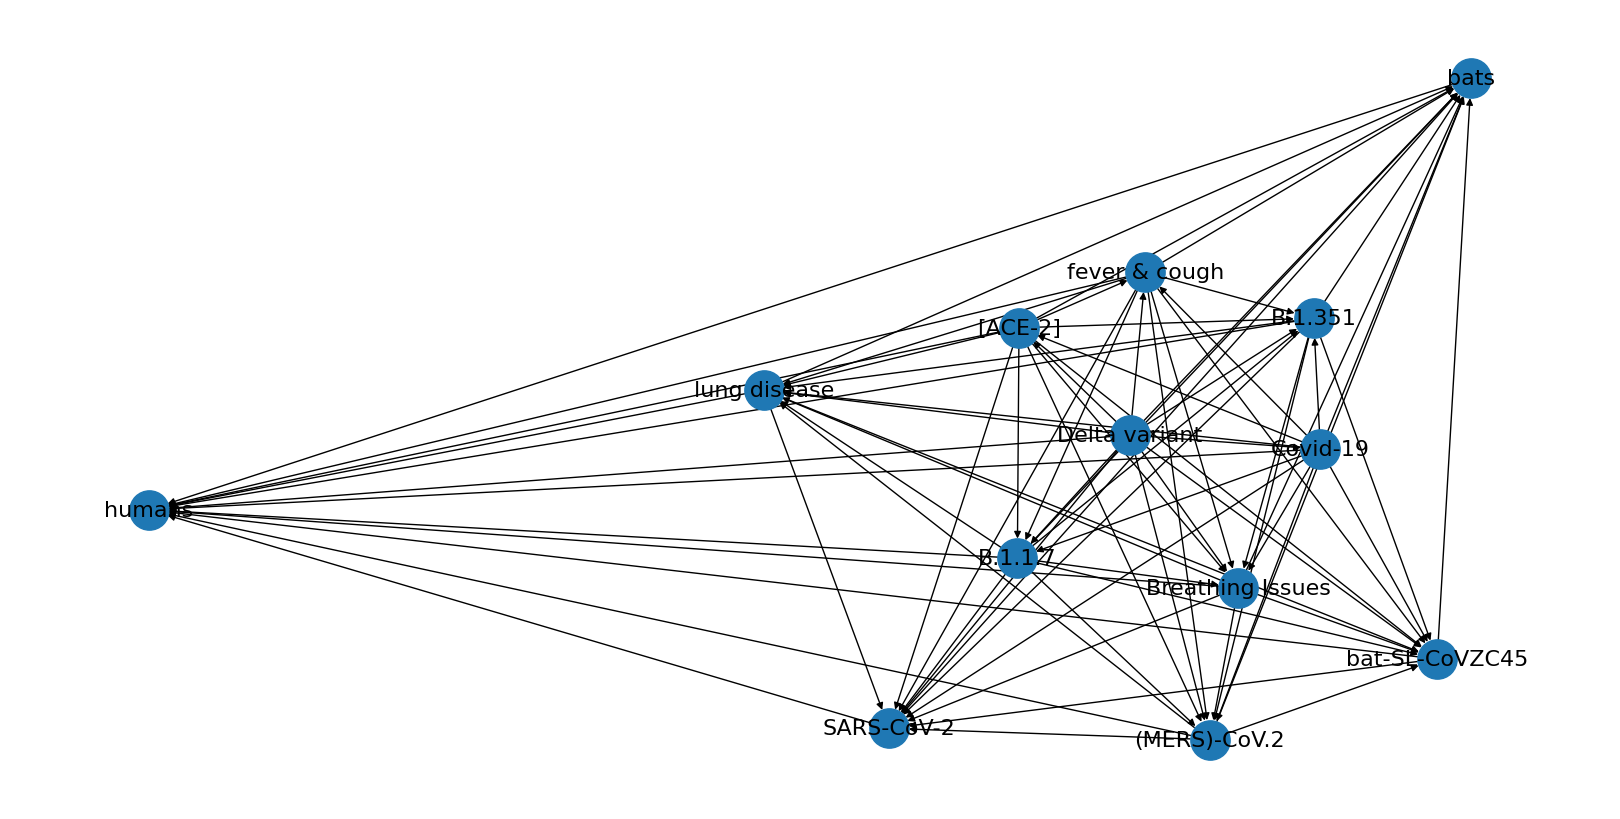

In [14]:
# With specific Entities
import networkx as nx
import matplotlib.pyplot as plt

text_data = [
    "The emergence of the Delta variant has caused a surge in COVID-19 cases worldwide.",
    "SARS-CoV-2 originated in bats and may have been transmitted to humans through an intermediate host.",
    "Genetic mutations in the spike protein of SARS-CoV-2 contribute to the emergence of new variants.",
    "The virus causes the coronavirus disease 2019 (COVID-19), with common symptoms such as fever, cough, shortness of breath and fatigue.6,7 Early data indicated that about 20% of patients develop severe COVID-19 requiring hospitalization, including 5% who are admitted to the intensive care unit.8 Initial estimates of the case fatality rates were from 3.4% to 6.6% which is lower than that of SARS or MERS, 9.6% and 34.3% respectively.9–11 The mortality from COVID-19 is higher in people older than 65 years and in people with underlying comorbidities, such as chronic lung disease, serious heart conditions, high blood pressure, obesity and diabetes"
    "All viruses mutate. But three variants of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) have raised particular concerns. On Jan 21, 2021, the UK New and Emerging Respiratory Virus Threats Advisory Group (NERVTAG) issued a paper outlining the results from several preliminary analyses of B.1.1.7. The variant, which is highly transmissible, was initially identified in the south of England in September 2020, and has since spread to dozens of countries around the world. It carries 17 mutations in its genome, including eight in the spike protein, which forms the basis of the three COVID-19 vaccines that have been licensed in the UK. NERVTAG concluded that there was a “realistic possibility” that infection with B.1.1.7 is associated with an increased risk of death, compared with infection with the parental virus. The group stressed that its assessment was based on limited preliminary data and even if the results were confirmed, the overall risk of death would still be low."
]

# Function to extract entities from text using NER
def extract_entities(text):
    # NER model
    # using the fine-tuned NER model as in the previous code snippet
    entities = [('Delta variant', 'VARIANT'), ('Covid-19', 'CAUSE'), ('[ACE-2]' , 'VARIANT'), ('fever & cough', 'symptoms'), ('B.1.1.7', 'VARIANT'), ('B.1.351', 'VARIANT'), ('Breathing Issues', 'symptoms'), ('(MERS)-CoV.2', 'CAUSE'), ('lung disease', 'symptoms'), ('bat-SL-CoVZC45','VARIANT'),('SARS-CoV-2', 'CAUSE'), ('bats', 'CAUSE'), ('humans', 'CAUSE')]
    return entities

# Function to construct the knowledge graph
def construct_knowledge_graph(text_data):
    G = nx.DiGraph()

    for text in text_data:
        entities = extract_entities(text)

        # Add nodes for entities
        for entity, label in entities:
            G.add_node(entity, label=label)

        # Add edges between entities
        for i in range(len(entities)):
            for j in range(i+1, len(entities)):
                G.add_edge(entities[i][0], entities[j][0])
    return G

# Construct the knowledge graph
knowledge_graph = construct_knowledge_graph(text_data)
# Set figure size
plt.figure(figsize=(16, 8))
# Draw the graph with larger node and font sizes
nx.draw(knowledge_graph, with_labels=True, node_size=800, font_size=16)
# Show the plot
plt.show()

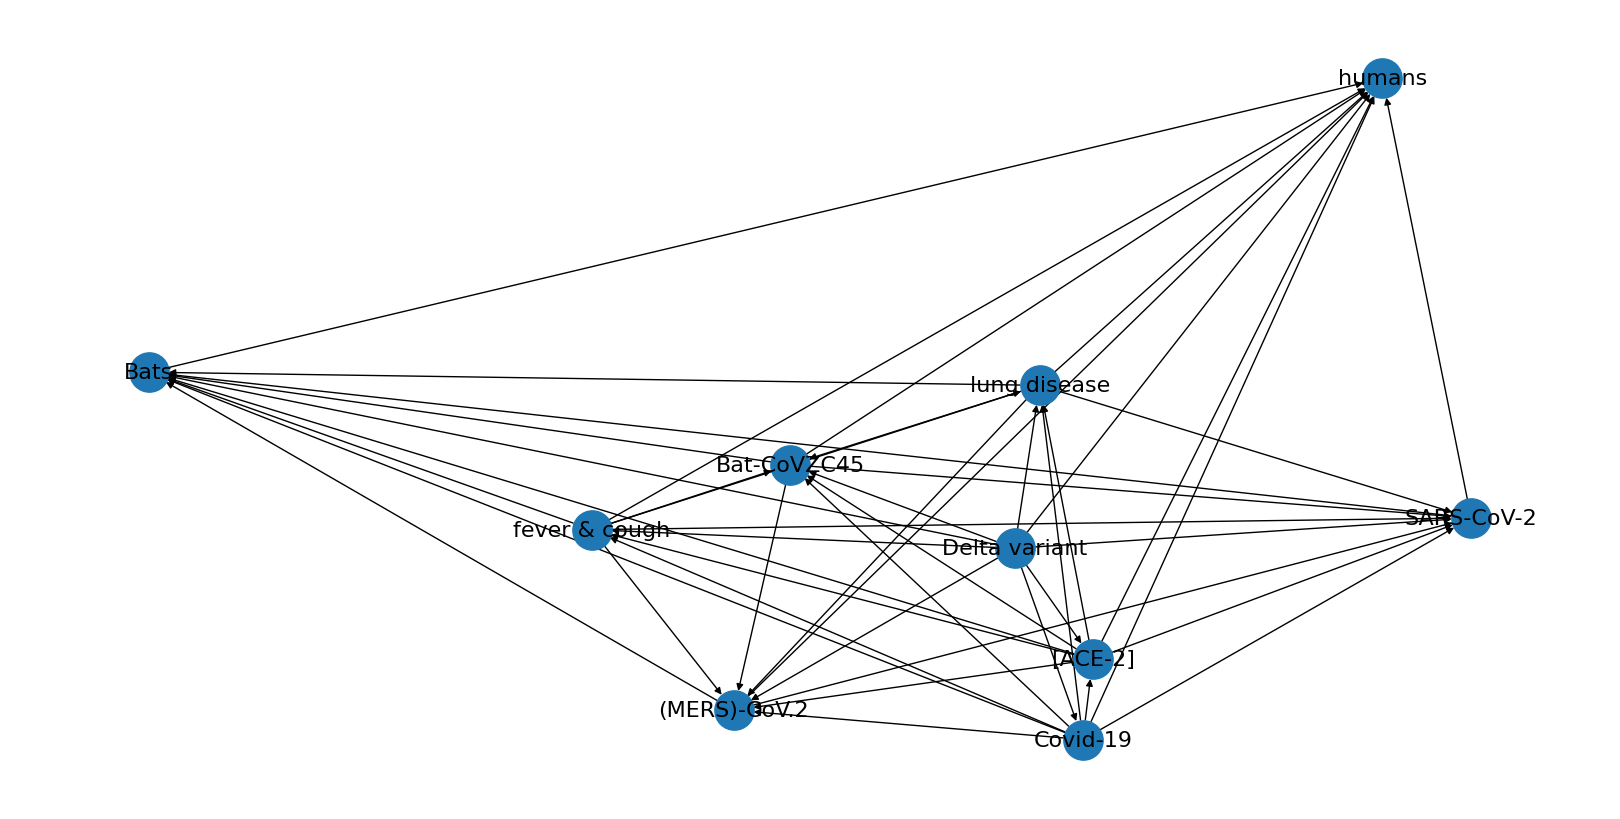

In [217]:
# With specific Entities (Simple Form)
import networkx as nx
import matplotlib.pyplot as plt

text_data = [
    "The emergence of the Delta variant has caused a surge in COVID-19 cases worldwide.",
    "SARS-CoV-2 originated in bats and may have been transmitted to humans through an intermediate host.",
    "Genetic mutations in the spike protein of SARS-CoV-2 contribute to the emergence of new variants.",
    "The virus causes the coronavirus disease 2019 (COVID-19), with common symptoms such as fever, cough, shortness of breath and fatigue.6,7 Early data indicated that about 20% of patients develop severe COVID-19 requiring hospitalization, including 5% who are admitted to the intensive care unit.8 Initial estimates of the case fatality rates were from 3.4% to 6.6% which is lower than that of SARS or MERS, 9.6% and 34.3% respectively.9–11 The mortality from COVID-19 is higher in people older than 65 years and in people with underlying comorbidities, such as chronic lung disease, serious heart conditions, high blood pressure, obesity and diabetes"
    "All viruses mutate. But three variants of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) have raised particular concerns. On Jan 21, 2021, the UK New and Emerging Respiratory Virus Threats Advisory Group (NERVTAG) issued a paper outlining the results from several preliminary analyses of B.1.1.7. The variant, which is highly transmissible, was initially identified in the south of England in September 2020, and has since spread to dozens of countries around the world. It carries 17 mutations in its genome, including eight in the spike protein, which forms the basis of the three COVID-19 vaccines that have been licensed in the UK. NERVTAG concluded that there was a “realistic possibility” that infection with B.1.1.7 is associated with an increased risk of death, compared with infection with the parental virus. The group stressed that its assessment was based on limited preliminary data and even if the results were confirmed, the overall risk of death would still be low."
]

# Function to extract entities from text using NER
def extract_entities(text):
    # NER model
    # using the fine-tuned NER model as in the previous code snippet
    entities = [('Delta variant', 'VARIANT'), ('Covid-19', 'CAUSE'), ('[ACE-2]' , 'VARIANT'), ('fever & cough', 'symptoms'), ('lung disease', 'symptoms'), ('Bat-CoVZC45','VARIANT'), ('(MERS)-CoV.2', 'CAUSE'),('SARS-CoV-2', 'CAUSE'), ('Bats', 'CAUSE'), ('humans', 'CAUSE')]
    return entities

# Function to construct the knowledge graph
def construct_knowledge_graph(text_data):
    G = nx.DiGraph()

    for text in text_data:
        entities = extract_entities(text)

        # Add nodes for entities
        for entity, label in entities:
            G.add_node(entity, label=label)

        # Add edges between entities
        for i in range(len(entities)):
            for j in range(i+1, len(entities)):
                G.add_edge(entities[i][0], entities[j][0])
    return G

# Construct the knowledge graph
knowledge_graph = construct_knowledge_graph(text_data)
# Set figure size
plt.figure(figsize=(16, 8))
# Draw the graph with larger node and font sizes
nx.draw(knowledge_graph, with_labels=True, node_size=800, font_size=16)
# Show the plot
plt.show()